In [1]:
import os
import csv
import numpy as np
import rasterio as rio
from scipy import misc
from matplotlib import pyplot as plt

In [2]:
from modis_utils.misc import restore_data, cache_data, normalize_data
from modis_utils.misc import get_data_paths, get_target_paths, get_data_from_data_file, get_target_from_target_file
from modis_utils.image_processing import get_pixel_weights, mask_lake_img

In [3]:
inference_dir = 'inference_multi_steps'
data_types = ['test', 'val']

In [8]:
groundtruth_predict_water_area = restore_data('visualize/test/groundtruth_predict_water_area.dat')

In [23]:
groundtruth_water_area = groundtruth_predict_water_area[0]
predict_water_area = groundtruth_predict_water_area[1]

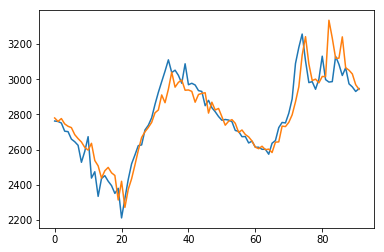

In [24]:
plt.plot(groundtruth_water_area)
plt.plot(predict_water_area)

In [11]:
n_steps = 80

In [15]:
water_threshold = -0.9680795202031212

In [35]:
def get_predict_multisteps_water_area(predict):
    water_area = []
    for img in predict:
        mask_lake = mask_lake_img(img, water_threshold)
        water_area.append(np.sum(mask_lake)*0.25*0.25)
    return np.vstack(water_area)

In [38]:
visualize_dir = 'visualize/inference_multi_steps'
if not os.path.exists(visualize_dir):
    os.makedirs(visualize_dir)

In [39]:
def test(data_type, idx):
    groundtruth_water_area_idx = groundtruth_water_area[idx : idx + n_steps]
    predict = restore_data(os.path.join(inference_dir, data_type, '{}.dat'.format(idx)))
    predict_water_area = get_predict_multisteps_water_area(predict)
    
    fig, ax = plt.subplots(1,1, figsize=(20,10))
    ax.plot(groundtruth_water_area_idx, color='b', label='groundtruth')
    ax.plot(predict_water_area, color='r', label='predict')
    ax.legend()
    ax.set_title('Test ' + str(idx))
    
    visualize_data_type_dir = os.path.join(visualize_dir, data_type)
    if not os.path.exists(visualize_data_type_dir):
        os.makedirs(visualize_data_type_dir)
    plt.savefig(os.path.join(visualize_data_type_dir, '{}.png'.format(idx)))
    plt.show()

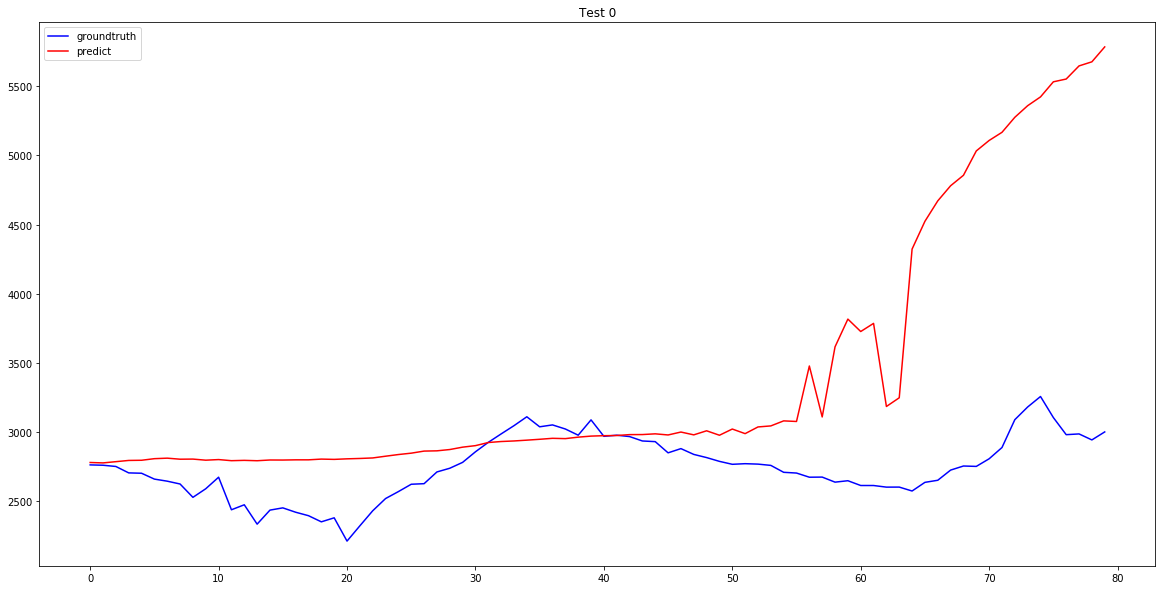

In [49]:
test('test', 0)

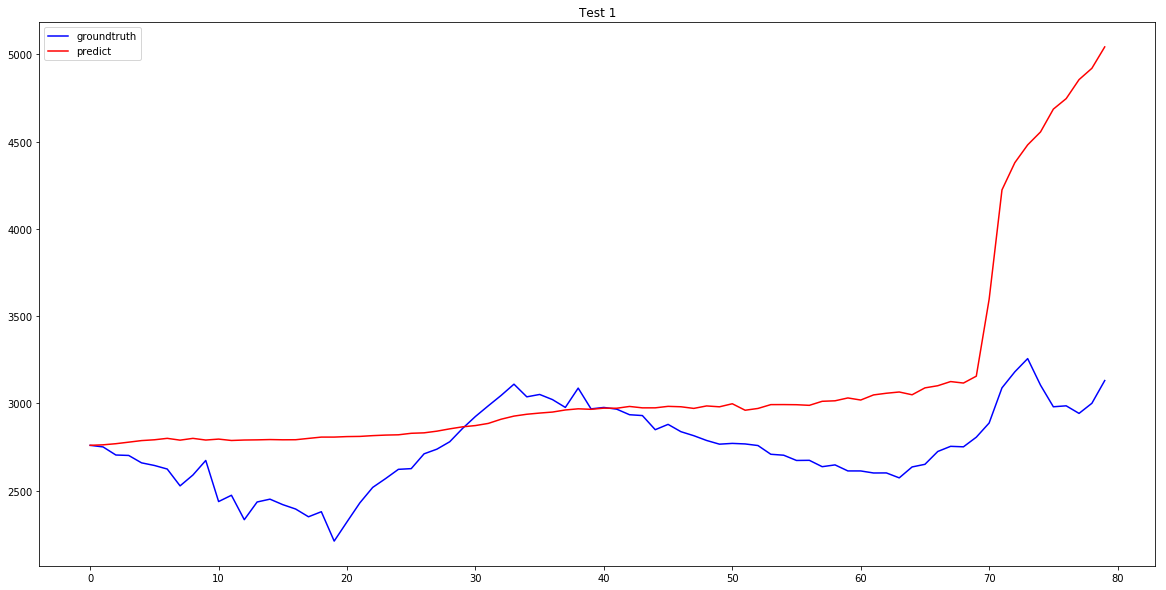

In [50]:
test('test', 1)

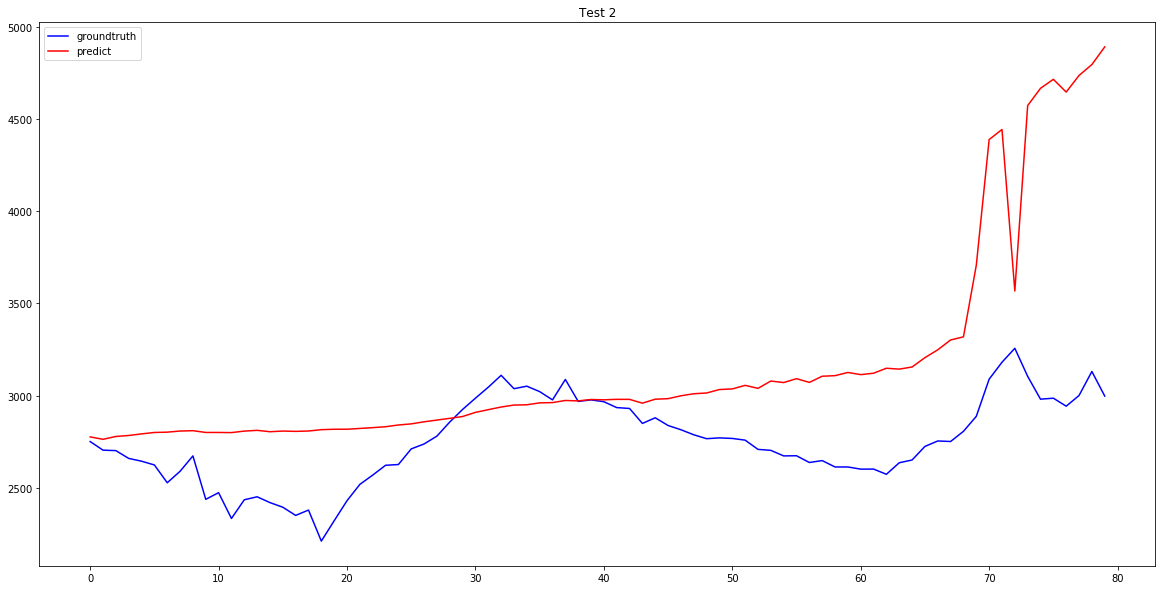

In [51]:
test('test', 2)

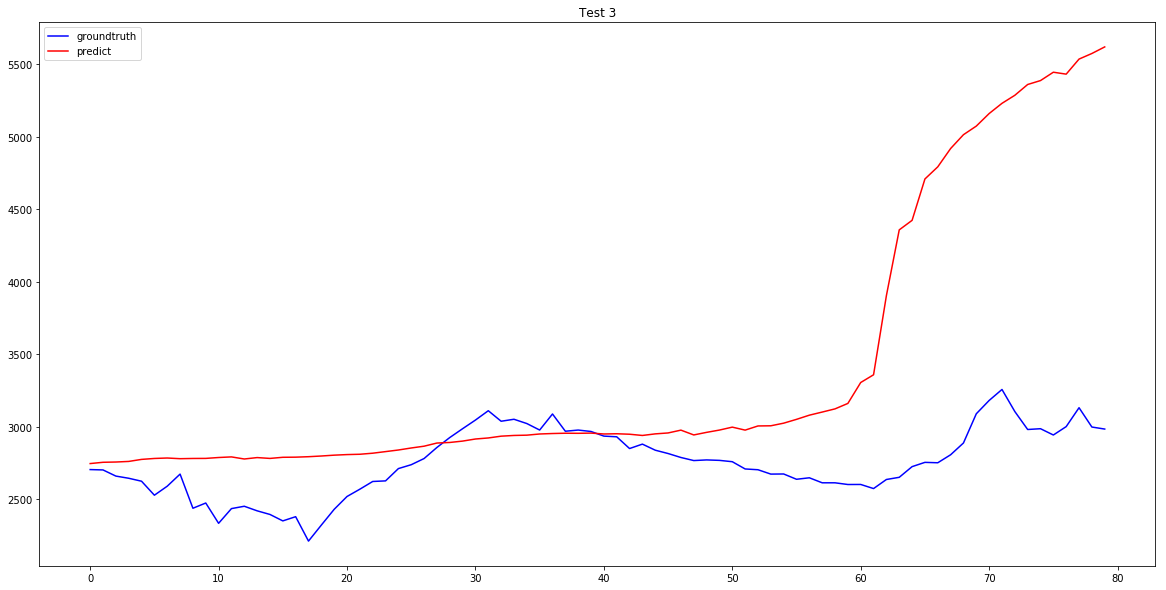

In [52]:
test('test', 3)

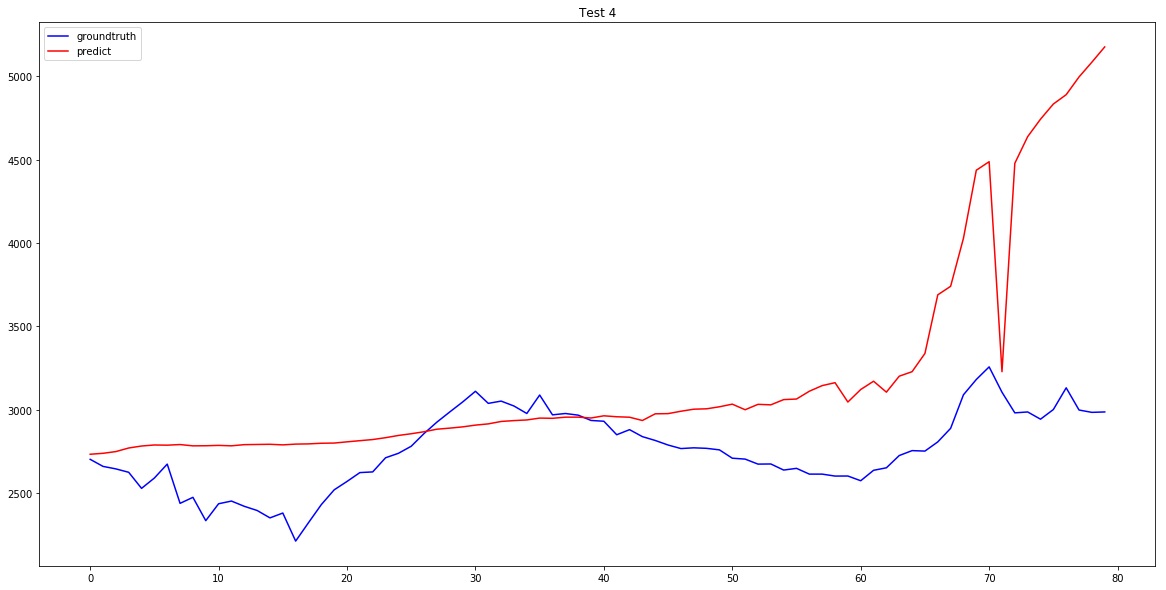

In [53]:
test('test', 4)

In [55]:
predict = restore_data(os.path.join(inference_dir, data_type, '{}.dat'.format(0)))

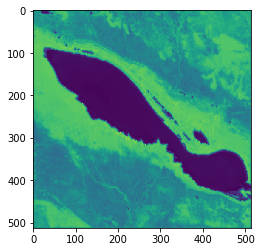

In [59]:
plt.imshow(predict[10])